In [270]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from google.colab import files

In [271]:
file=files.upload()

Saving Carriage Services, Inc.csv to Carriage Services, Inc (6).csv


In [272]:
df=pd.read_csv('Carriage Services, Inc.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-27,39.610001,39.980000,38.630001,39.810001,39.184914,127200
1,2022-06-28,40.070000,40.630001,39.320000,39.340000,38.722290,146100
2,2022-06-29,39.430000,39.430000,38.720001,39.009998,38.397472,117100
3,2022-06-30,38.520000,39.650002,37.830002,39.650002,39.027428,155000
4,2022-07-01,39.419998,40.310001,39.340000,40.230000,39.598316,72500


In [273]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,31.285538,31.777052,30.727331,31.250717,30.990450,104043.027888
std,4.850479,4.916583,4.813295,4.884795,4.736511,60066.090777
min,23.580000,24.049999,22.709999,23.400000,23.108843,32000.000000
25%,27.505000,27.850000,27.190001,27.495000,27.455000,64950.000000
50%,30.940001,31.290001,30.400000,30.760000,30.550352,88400.000000
75%,33.980000,34.330000,33.465000,34.000000,33.756743,124700.000000
max,44.060001,44.520000,43.220001,44.049999,43.358337,514100.000000


In [274]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [275]:
df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [276]:
#Set date as index
df.set_index('Date', inplace=True)

#Sort values in ascending order  from oldest to newest
df.sort_values('Date', ascending=True)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-27,39.610001,39.980000,38.630001,39.810001,39.184914,127200
2022-06-28,40.070000,40.630001,39.320000,39.340000,38.722290,146100
2022-06-29,39.430000,39.430000,38.720001,39.009998,38.397472,117100
2022-06-30,38.520000,39.650002,37.830002,39.650002,39.027428,155000
2022-07-01,39.419998,40.310001,39.340000,40.230000,39.598316,72500
...,...,...,...,...,...,...
2023-06-20,27.490000,27.670000,27.219999,27.490000,27.490000,39100
2023-06-21,27.400000,27.549999,27.139999,27.480000,27.480000,37200
2023-06-22,27.290001,27.440001,26.940001,27.440001,27.440001,44500


In [277]:
df['High-Low-pct']=(df['High']-df['Low']).pct_change()  #%age change between low and high price of assests
df['avg-price-5']=df['Close'].ewm(span=5).mean().shift(periods=1) #Mean price of last five days
df['price-std-5']=df['Close'].rolling(center=False, window=30).std().shift(periods=1) #STD of price of last five days
df['Volum Change']=df['Volume'].pct_change()  #%age change in volume of assests on daily basis
df['avg-Volum-5']=df['Volume'].rolling(center=False,window=5).mean().shift(periods=1)  #Mean Volum of last 5 days
df['Volume Close']=df['Volume'].rolling(center=False,window=5).std().shift(periods=1) #STD of Volum of assests on daily basis
df.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
High-Low-pct     1
avg-price-5      1
price-std-5     30
Volum Change     1
avg-Volum-5      5
Volume Close     5
dtype: int64

<ipython-input-278-902f6fc03785>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df["Adj Close"], asset, c = next(colors))


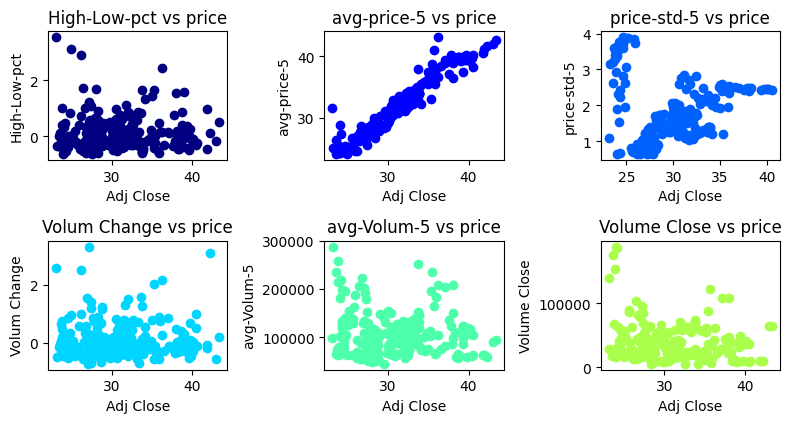

In [278]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

def correlation(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(8,6))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["Adj Close"], asset, c = next(colors))
        ax.set_xlabel("Adj Close")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs price")
    fig.tight_layout()
    plt.show()

# Take the name of the last 6 columns of the SPY_data which are the model features
variables = df.columns[-6:]

correlation(df,variables,3,3)

In [279]:
df.corr()['Adj Close'].loc[variables]

High-Low-pct   -0.023483
avg-price-5     0.967509
price-std-5     0.033567
Volum Change    0.007884
avg-Volum-5    -0.084823
Volume Close   -0.154538
Name: Adj Close, dtype: float64

In [280]:
df.isnull().sum().loc[variables]

High-Low-pct     1
avg-price-5      1
price-std-5     30
Volum Change     1
avg-Volum-5      5
Volume Close     5
dtype: int64

In [281]:
df.dropna(axis=0, inplace=True)

In [282]:
#distribute data into train and test
train=df[df.index<datetime(year=2022, month=12, day=31)]
test=df[df.index>=datetime(year=2022, month=12, day=31)]
dates=test.index

In [283]:
lr=LinearRegression()
X_train=train[['High-Low-pct','avg-price-5', 'price-std-5', 'Volum Change', 'avg-Volum-5','Volume Close']]
Y_train=train['Adj Close']
lr.fit(X_train, Y_train)

LinearRegression()

In [284]:
X_test=test[['High-Low-pct','avg-price-5', 'price-std-5', 'Volum Change', 'avg-Volum-5','Volume Close']]
Y_test=test['Adj Close']
close_prediction=lr.predict(X_test)
mae=mean_absolute_error(Y_test, close_prediction)
print(mae)

0.6429345198247071


In [285]:
#Create a dataframe that output the Date, Actual and predicted values
df1=pd.DataFrame({'Date':dates, 'Actual':Y_test, 'Predicted':close_prediction})
df2=df1.tail(25)
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2023-05-19 to 2023-06-26
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       25 non-null     datetime64[ns]
 1   Actual     25 non-null     float64       
 2   Predicted  25 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 800.0 bytes


In [286]:
df2['Date']=df2['Date'].dt.strftime('%Y-%m-%d')
df2.set_index('Date', inplace=True)
error=df2['Actual']-df2['Predicted']

<ipython-input-286-222d667eff3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date']=df2['Date'].dt.strftime('%Y-%m-%d')


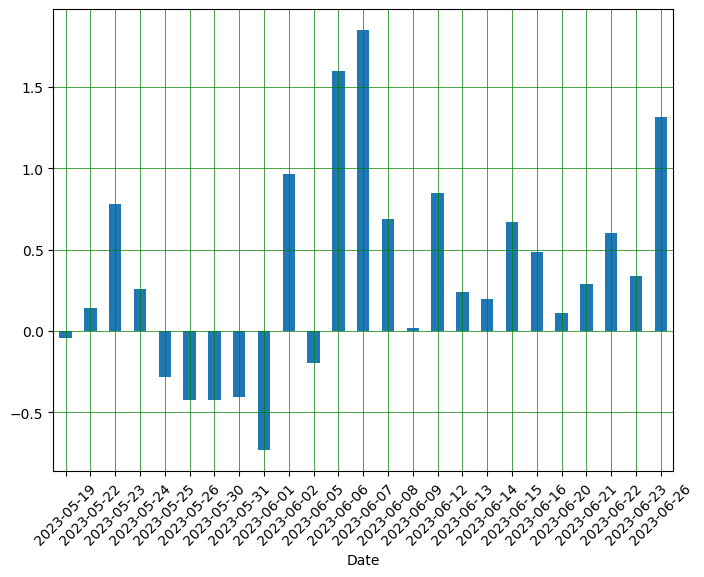

In [287]:
# Plot the error term between the actual and predicted values for the last 25 days

error.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()